# Mick Schumacher
<img src="https://www.formula1.com/content/fom-website/en/drivers/mick-schumacher/_jcr_content/image.img.1920.medium.jpg/1641824836549.jpg" width="300">

### Team: Haas F1 Team

<img src ="https://www.formula1.com/content/fom-website/en/drivers/mick-schumacher/_jcr_content/helmet.img.png/1617101189118.png" width="200">


In [1]:
library (tidyverse)
library (tidymodels)
source("source/master_functions.r")
source("source/regression.r")
source("source/prediction.r")
set.seed(620)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.9      ✔ rsample   0.0.7 
✔ infer     0.5.4      ✔ tune      0.1.1 
✔ modeldata 0.0.2      ✔ workflows 0.2.0 
✔ parsnip   0.1.3    

In [2]:
initialize_master()

Parsed with column specification:
cols(
  circuitId = col_double(),
  circuitRef = col_character(),
  name = col_character(),
  location = col_character(),
  country = col_character(),
  lat = col_double(),
  lng = col_double(),
  alt = col_character(),
  url = col_character()
)

Parsed with column specification:
cols(
  constructorStandingsId = col_double(),
  raceId = col_double(),
  constructorId = col_double(),
  points = col_double(),
  position = col_double(),
  positionText = col_character(),
  wins = col_double()
)

Parsed with column specification:
cols(
  constructorResultsId = col_double(),
  raceId = col_double(),
  constructorId = col_double(),
  points = col_double(),
  status = col_character()
)

Parsed with column specification:
cols(
  constructorId = col_double(),
  constructorRef = col_character(),
  name = col_character(),
  nationality = col_character(),
  url = col_character()
)

Parsed with column specification:
cols(
  driverId = col_double(),
  driverRef = col_

In [3]:
# Filtering Lap Data For 2022 Drivers

lap_data <- lap_times %>%
            filter(driverId %in% driver_ids) %>%
            filter(raceId %in% race_ids)

msc_laps <- lap_data %>%
            filter(driverId == 854)

# Filtering Lap Data for HAAS
haas_lap <- lap_data %>%
             filter(driverId %in% c(154, 821, 853))

# Season Analysis

In [4]:
rmse_col <- data.frame(.metric = character(), .estimator = character(), .estimate = double(), Round = double(), stringsAsFactors=FALSE) 

racetime_col <- data.frame(race_time_milliseconds = double(), race_time_mins = double(), race_time_hrs = double()) 

rmse_col

racetime_col

.metric,.estimator,.estimate,Round
<chr>,<chr>,<dbl>,<dbl>


race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>


`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1052,55


Warning message:
“The number of observations in each quantile is below the recommended threshold of 20. Stratification will be done with 2 breaks instead.”
`geom_smooth()` using formula 'y ~ x'



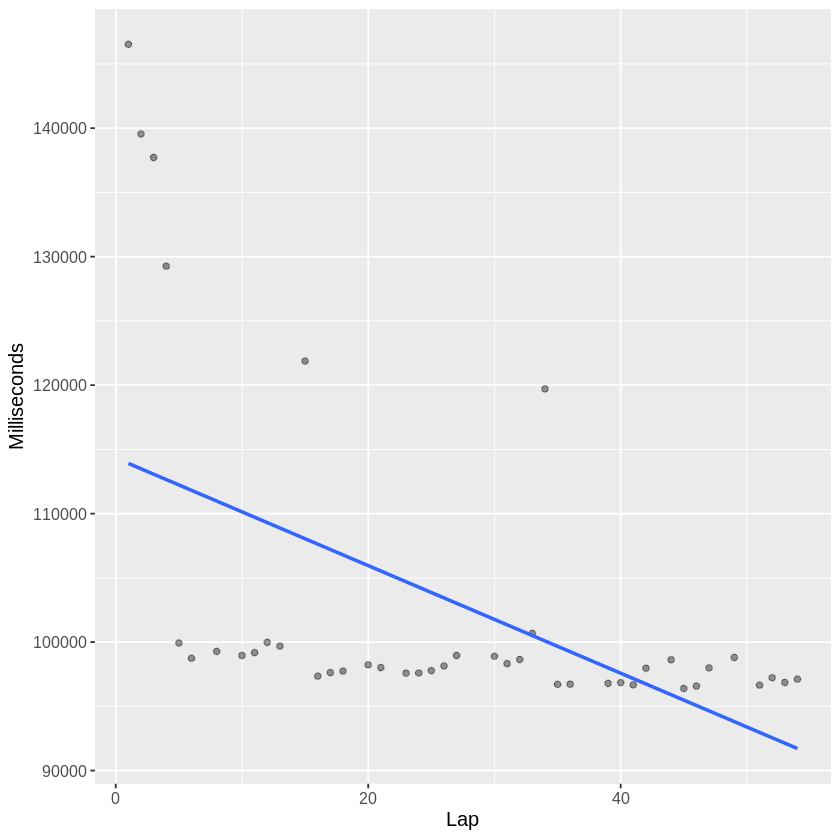

In [5]:
set.seed(2022)

#1. BAHRAIN 

ms_bahrain <- msc_laps %>%
                filter(raceId %in% bahrain_race_ID) 

ms_bahrain_clean <- ms_bahrain %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n))
ms_bahrain_clean
ms_bahrain_clean_ID <- ms_bahrain_clean %>%
                        pull(raceId)


### SPLITTING DATA

ms_bahrain_races <- msc_laps %>%
                    filter(raceId %in% ms_bahrain_clean_ID)

formulaone_split <- initial_split(ms_bahrain_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 1

initiate_rmse() 

### GETS PREDICTION

get_bahrain_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1054,64


Warning message:
“The number of observations in each quantile is below the recommended threshold of 20. Stratification will be done with 3 breaks instead.”
`geom_smooth()` using formula 'y ~ x'



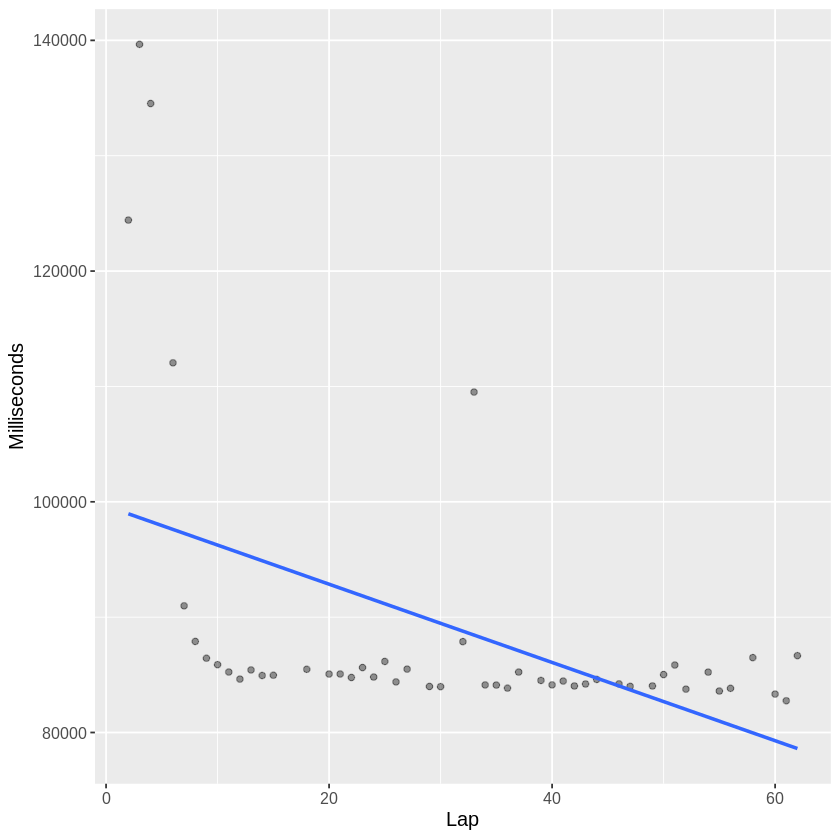

In [6]:
set.seed(2022)

#2. Portimão

ms_Portimão <- msc_laps %>%
                filter(raceId %in% Portimão_race_ID) 

ms_Portimão_clean <- ms_Portimão %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
ms_Portimão_clean
ms_Portimão_clean_ID <- ms_Portimão_clean %>%
                        pull(raceId)


### SPLITTING DATA

ms_Portimão_races <- msc_laps %>%
                    filter(raceId %in% ms_Portimão_clean_ID) 

formulaone_split <- initial_split(ms_Portimão_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 2

initiate_rmse() 

### GETS PREDICTION

get_Portimão_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
948,73
1010,29
989,24
969,13


`geom_smooth()` using formula 'y ~ x'



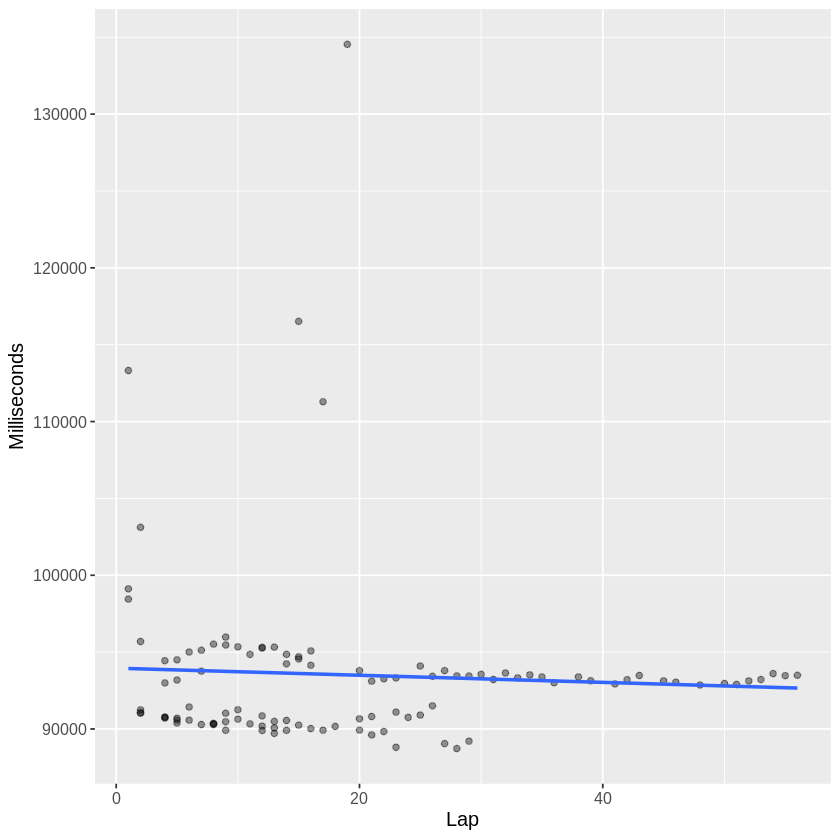

In [7]:
set.seed(2022)

#3. Australia

ms_aus <- haas_lap %>%
                filter(raceId %in% aus_race_ID) 

ms_aus_clean <- ms_aus %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
ms_aus_clean
ms_aus_clean_ID <- ms_aus_clean %>%
                        pull(raceId)


### SPLITTING DATA

ms_aus_races <- haas_lap %>%
                    filter(raceId %in% ms_aus_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(2:1000)

formulaone_split <- initial_split(ms_aus_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 3

initiate_rmse() 
 
### GETS PREDICTION

get_australia_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1053,61


Warning message:
“The number of observations in each quantile is below the recommended threshold of 20. Stratification will be done with 3 breaks instead.”
`geom_smooth()` using formula 'y ~ x'



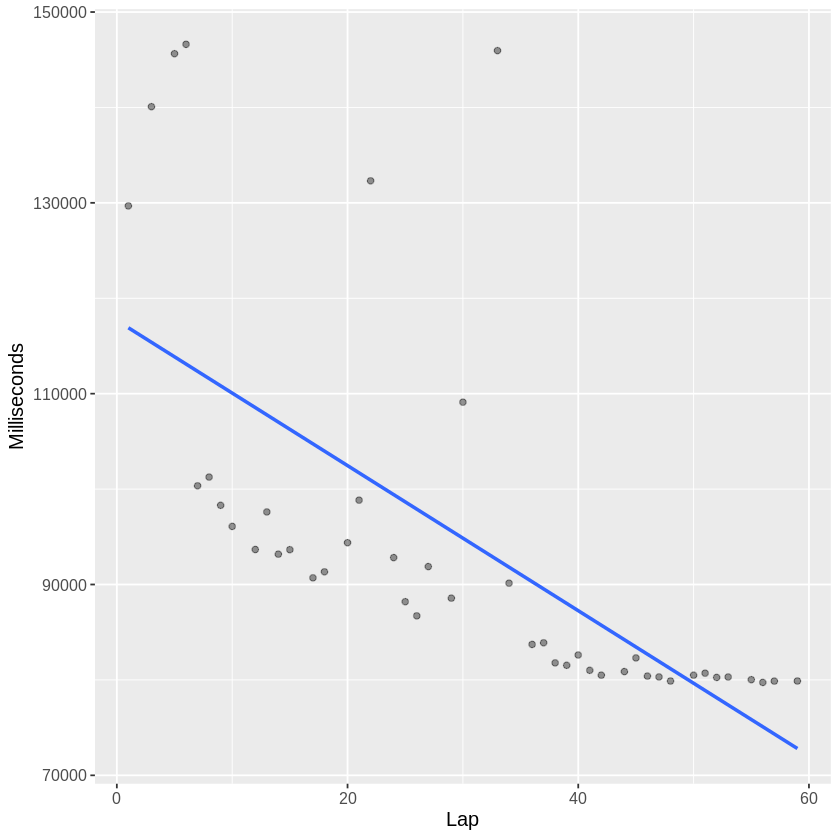

In [8]:
set.seed(2022)

#4. Italy, Imola

ms_imola <- msc_laps %>%
                filter(raceId %in% imola_race_ID) 

ms_imola_clean <- ms_imola %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
ms_imola_clean
ms_imola_clean_ID <- ms_imola_clean %>%
                        pull(raceId)


### SPLITTING DATA

ms_imola_races <- msc_laps %>%
                    filter(raceId %in% ms_imola_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(2:1000)

formulaone_split <- initial_split(ms_imola_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 4

initiate_rmse() 
 
### GETS PREDICTION

get_imola_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1067,56


Warning message:
“The number of observations in each quantile is below the recommended threshold of 20. Stratification will be done with 2 breaks instead.”
`geom_smooth()` using formula 'y ~ x'



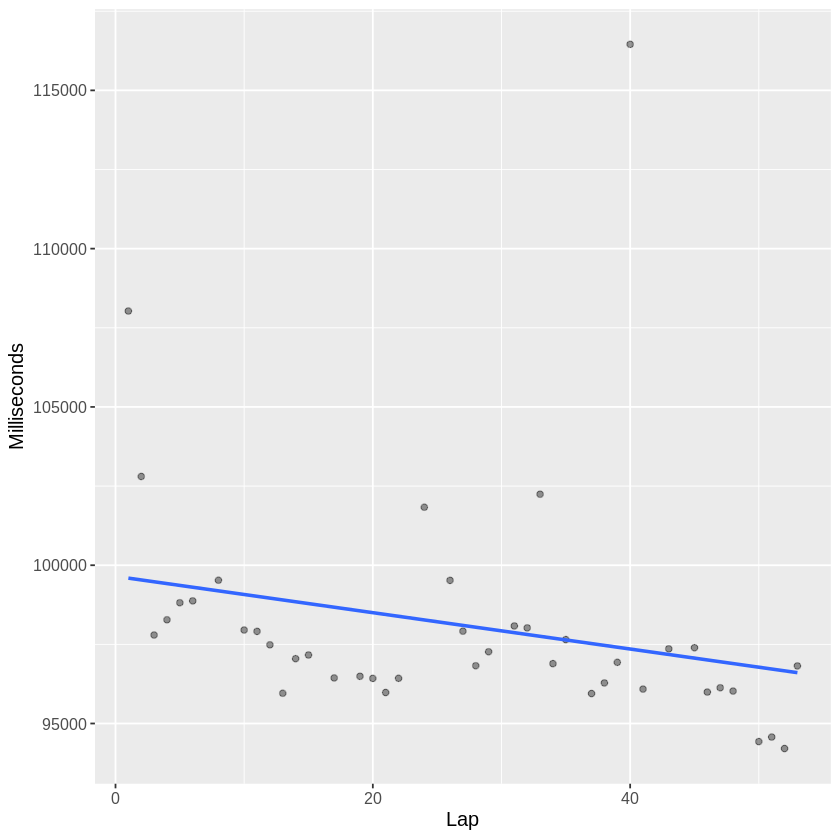

In [9]:
set.seed(2022)

#5. Turkey (Replacing Miami)

ms_turkey <- msc_laps %>%
                filter(raceId %in% turkey_race_ID) 

ms_turkey_clean <- ms_turkey %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
ms_turkey_clean
ms_turkey_clean_ID <- ms_turkey_clean %>%
                        pull(raceId)


### SPLITTING DATA

ms_turkey_races <- msc_laps %>%
                    filter(raceId %in% ms_turkey_clean_ID)

formulaone_split <- initial_split(ms_turkey_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 5

initiate_rmse() 
 
### GETS PREDICTION

get_miami_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1055,64


Warning message:
“The number of observations in each quantile is below the recommended threshold of 20. Stratification will be done with 3 breaks instead.”
`geom_smooth()` using formula 'y ~ x'



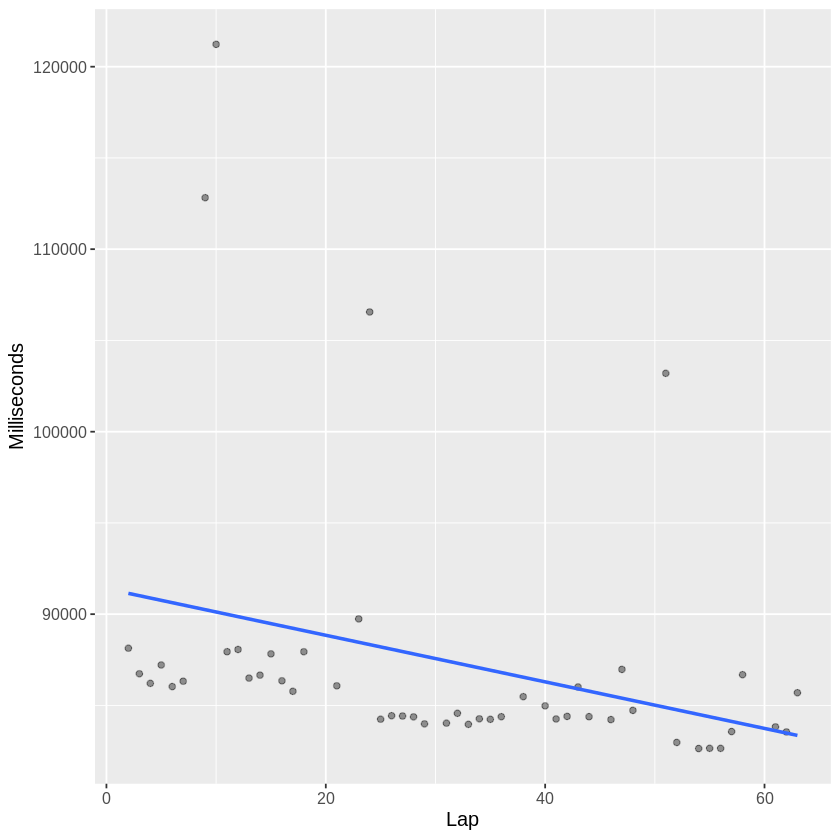

In [10]:
set.seed(2022)

#6. Spain

ms_spain <- msc_laps %>%
                filter(raceId %in% spain_race_ID) 

ms_spain_clean <- ms_spain %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
ms_spain_clean
ms_spain_clean_ID <- ms_spain_clean %>%
                        pull(raceId)


### SPLITTING DATA

ms_spain_races <- msc_laps %>%
                    filter(raceId %in% ms_spain_clean_ID)

formulaone_split <- initial_split(ms_spain_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 6

initiate_rmse() 

### GETS PREDICTION

get_spain_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1056,75


Warning message:
“The number of observations in each quantile is below the recommended threshold of 20. Stratification will be done with 3 breaks instead.”
`geom_smooth()` using formula 'y ~ x'



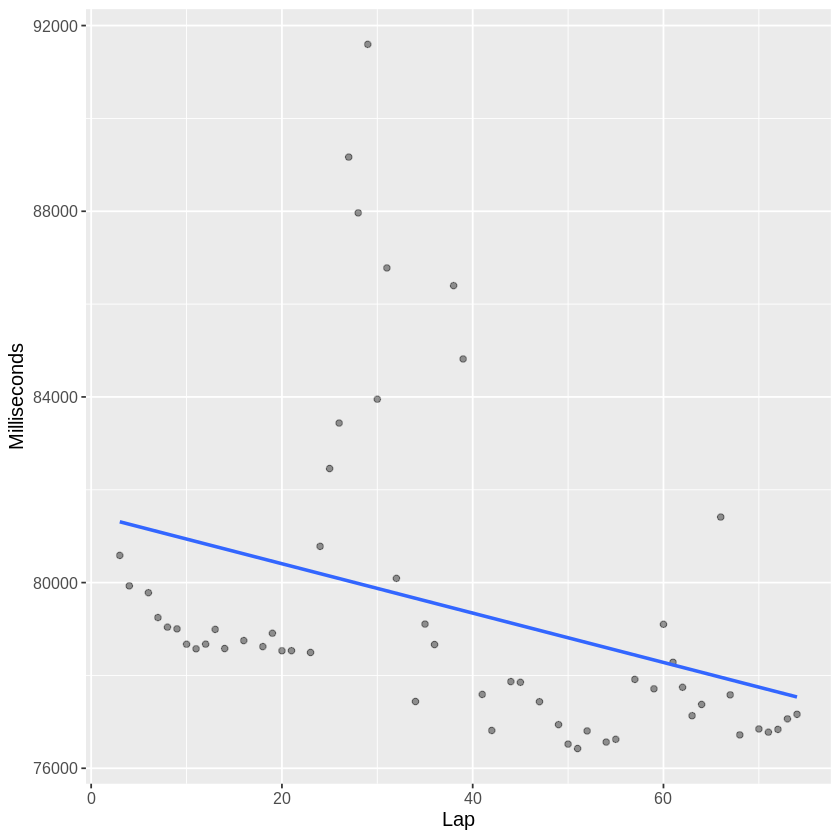

In [11]:
set.seed(2022)

#7. Monaco

ms_monaco <- msc_laps %>%
                filter(raceId %in% monaco_race_ID) 

ms_monaco_clean <- ms_monaco %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
ms_monaco_clean
ms_monaco_clean_ID <- ms_monaco_clean %>%
                        pull(raceId)


### SPLITTING DATA

ms_monaco_races <- msc_laps %>%
                    filter(raceId %in% ms_monaco_clean_ID)

formulaone_split <- initial_split(ms_monaco_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 7

initiate_rmse() 

### GETS PREDICTION

get_monaco_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1057,51


Warning message:
“The number of observations in each quantile is below the recommended threshold of 20. Stratification will be done with 2 breaks instead.”
`geom_smooth()` using formula 'y ~ x'



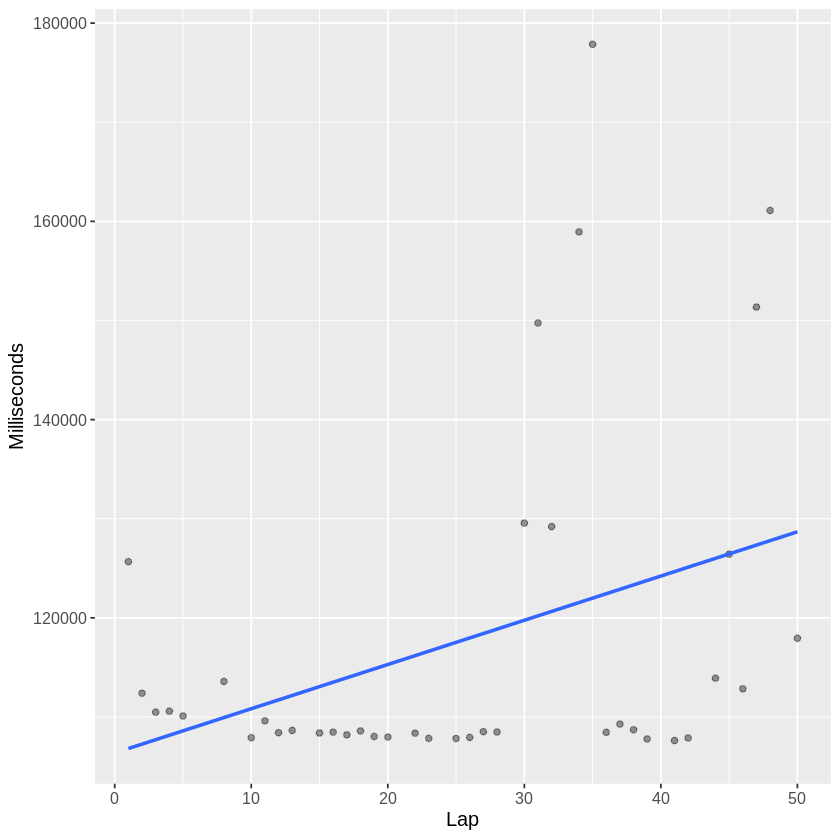

In [12]:
set.seed(2022)

#8. Azerbaijan

ms_azerbaijan <- msc_laps %>%
                filter(raceId %in% azerbaijan_race_ID) 

ms_azerbaijan_clean <- ms_azerbaijan %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
ms_azerbaijan_clean
ms_azerbaijan_clean_ID <- ms_azerbaijan_clean %>%
                        pull(raceId)


### SPLITTING DATA

ms_azerbaijan_races <- msc_laps %>%
                    filter(raceId %in% ms_azerbaijan_clean_ID) 

formulaone_split <- initial_split(ms_azerbaijan_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 8

initiate_rmse() 

### GETS PREDICTION

get_azerbaijan_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
954,136
975,69
1016,69
995,67


`geom_smooth()` using formula 'y ~ x'



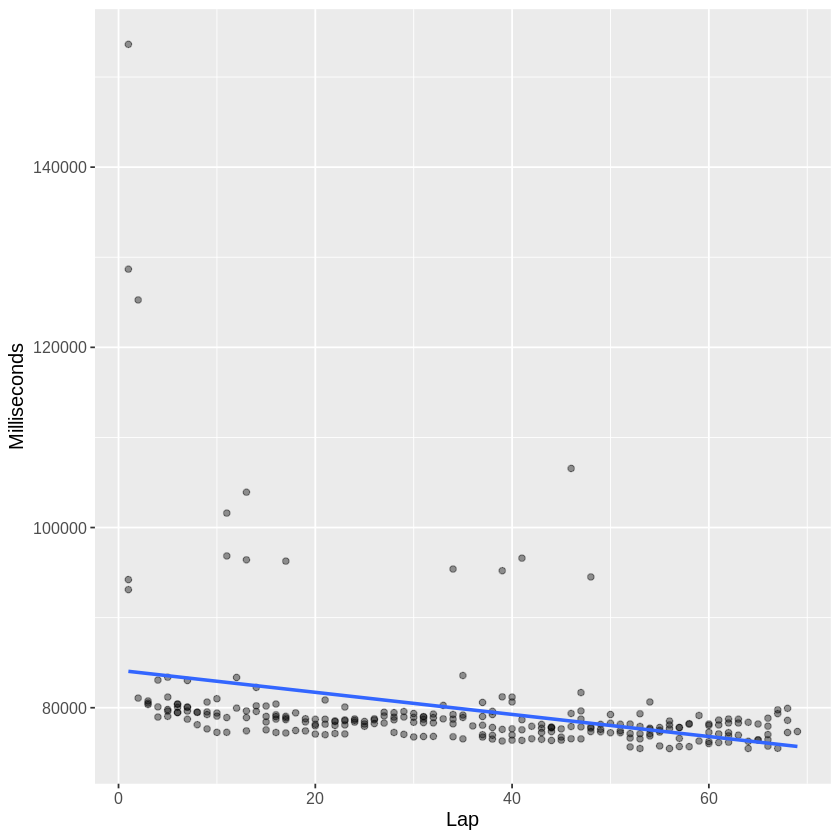

In [13]:
set.seed(2022)

#9. Canada

ms_canada <- haas_lap %>%
                filter(raceId %in% canada_race_ID) 

ms_canada_clean <- ms_canada %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
ms_canada_clean
ms_canada_clean_ID <- ms_canada_clean %>%
                        pull(raceId)


### SPLITTING DATA

ms_canada_races <- haas_lap %>%
                    filter(raceId %in% ms_canada_clean_ID)

formulaone_split <- initial_split(ms_canada_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 9

initiate_rmse() 

### GETS PREDICTION

get_canada_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1061,51


Warning message:
“The number of observations in each quantile is below the recommended threshold of 20. Stratification will be done with 2 breaks instead.”
`geom_smooth()` using formula 'y ~ x'



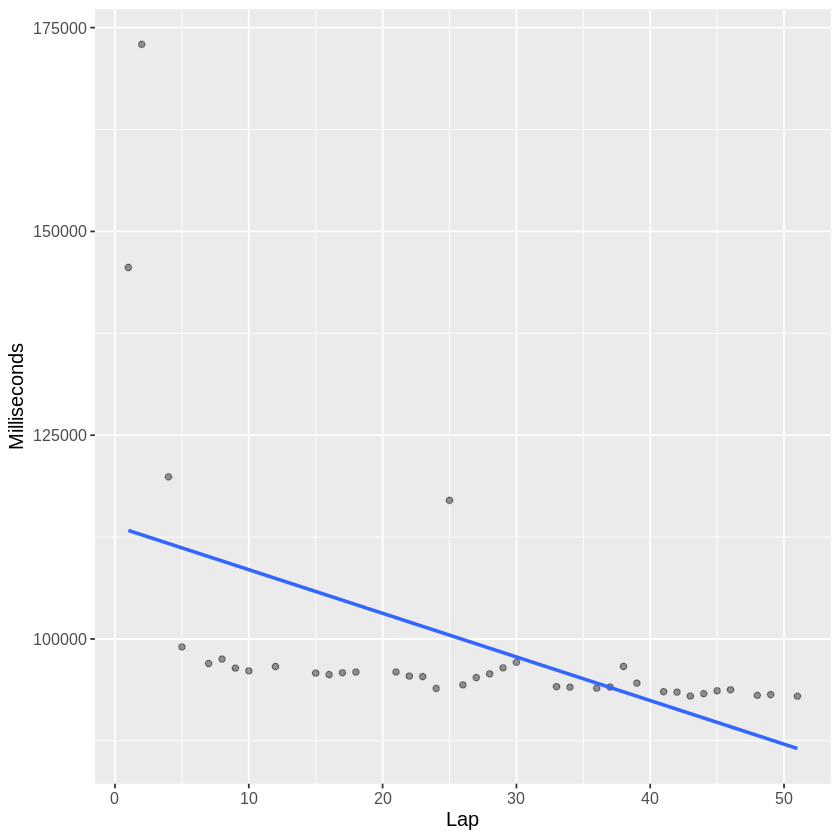

In [14]:
set.seed(2022)

#10. Great Britain

ms_uk <- msc_laps %>%
                filter(raceId %in% uk_race_ID) 

ms_uk_clean <- ms_uk %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
ms_uk_clean
ms_uk_clean_ID <- ms_uk_clean %>%
                        pull(raceId)


### SPLITTING DATA

ms_uk_races <- msc_laps %>%
                    filter(raceId %in% ms_uk_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(2:1000)

formulaone_split <- initial_split(ms_uk_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 10

initiate_rmse() 

### GETS PREDICTION

get_uk_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1058,69
1060,69


`geom_smooth()` using formula 'y ~ x'



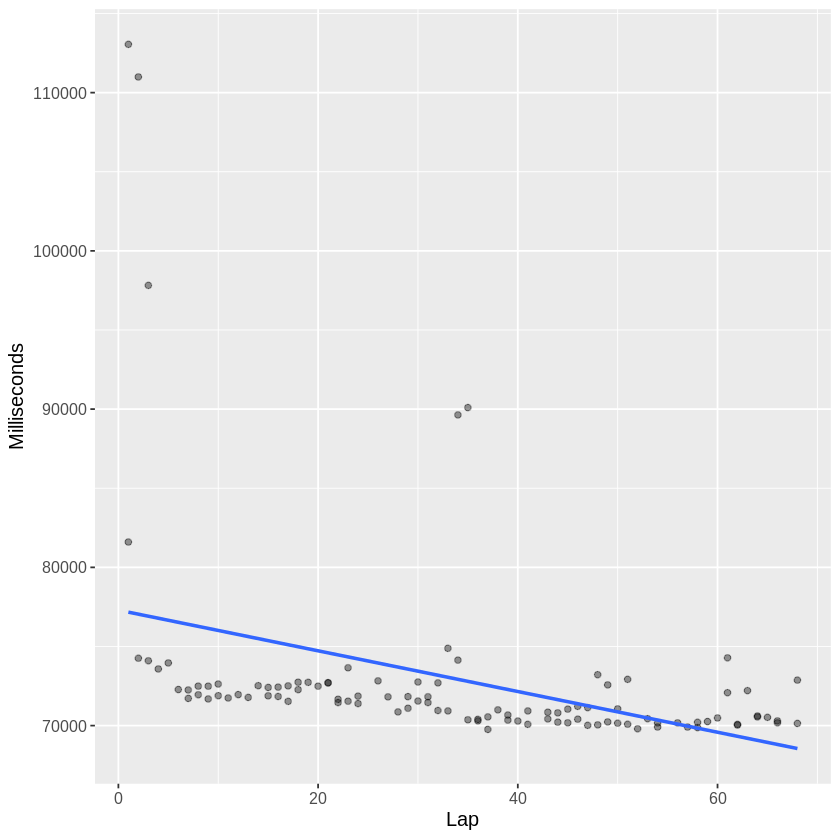

In [15]:
set.seed(2022)

#11. Austria

ms_austria <- msc_laps %>%
                filter(raceId %in% austria_race_ID) 

ms_austria_clean <- ms_austria %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
ms_austria_clean
ms_austria_clean_ID <- ms_austria_clean %>%
                        pull(raceId)


### SPLITTING DATA

ms_austria_races <- msc_laps %>%
                    filter(raceId %in% ms_austria_clean_ID)

formulaone_split <- initial_split(ms_austria_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 11

initiate_rmse() 

### GETS PREDICTION

get_austria_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
996,52
1059,52
1017,44


`geom_smooth()` using formula 'y ~ x'



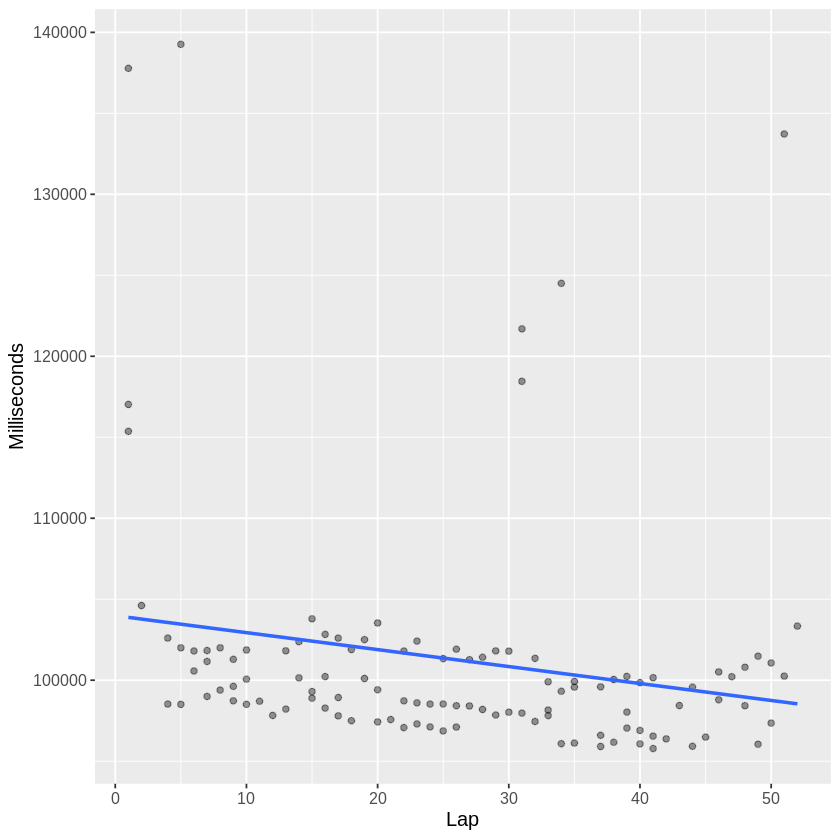

In [16]:
set.seed(2022)

#12. France

ms_france <- haas_lap %>%
                filter(raceId %in% france_race_ID) 

ms_france_clean <- ms_france %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
ms_france_clean
ms_france_clean_ID <- ms_france_clean %>%
                        pull(raceId)


### SPLITTING DATA

ms_france_races <- haas_lap %>%
                    filter(raceId %in% ms_france_clean_ID)

formulaone_split <- initial_split(ms_france_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 12

initiate_rmse() 

### GETS PREDICTION

get_france_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1062,69


Warning message:
“The number of observations in each quantile is below the recommended threshold of 20. Stratification will be done with 3 breaks instead.”
`geom_smooth()` using formula 'y ~ x'



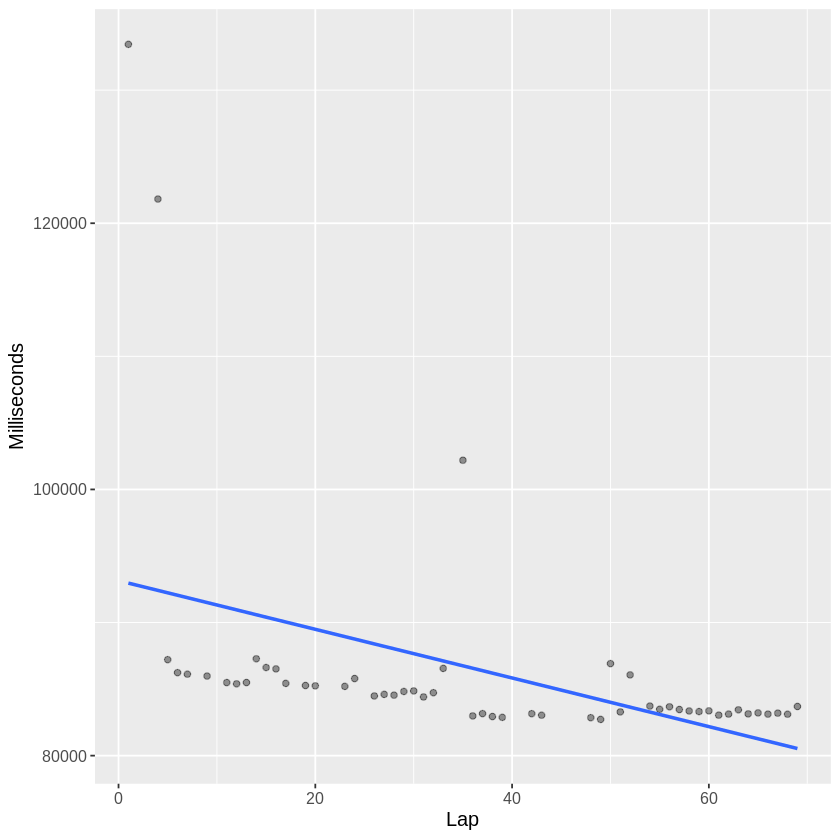

In [17]:
set.seed(2022)

#13. Hungary

ms_hungary <- msc_laps %>%
                filter(raceId %in% hungary_race_ID) 

ms_hungary_clean <- ms_hungary %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n))                      
ms_hungary_clean
ms_hungary_clean_ID <- ms_hungary_clean %>%
                        pull(raceId)


### SPLITTING DATA

ms_hungary_races <- msc_laps %>%
                    filter(raceId %in% ms_hungary_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(2:1000)

formulaone_split <- initial_split(ms_hungary_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 13

initiate_rmse() 

### GETS PREDICTION

get_hungary_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
960,88
980,44
1001,44
1037,44
1022,43
1063,1


`geom_smooth()` using formula 'y ~ x'



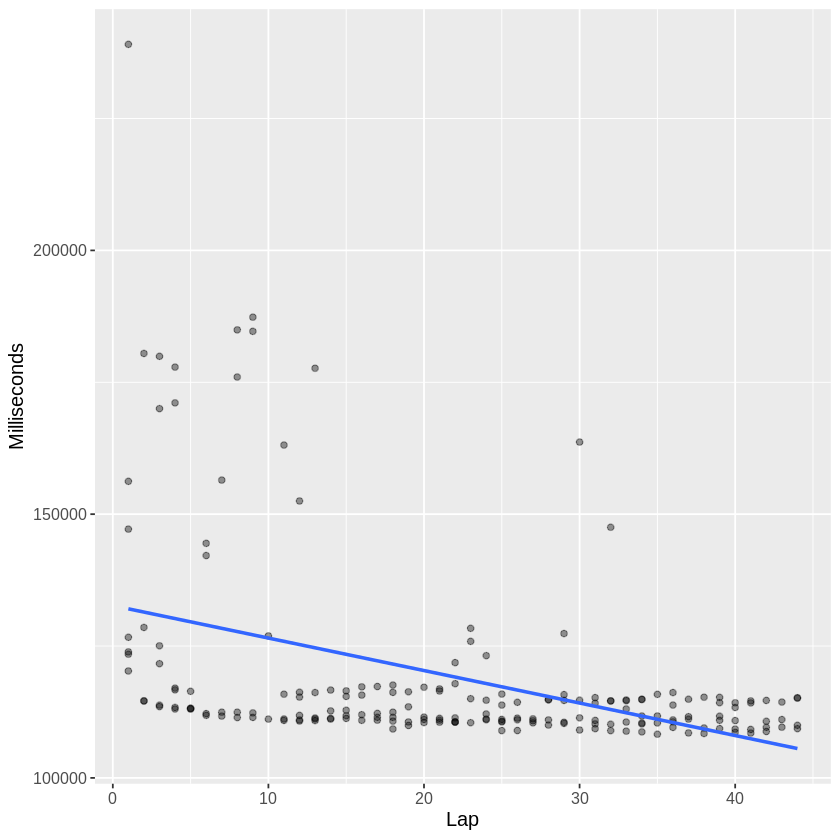

In [18]:
set.seed(2022)

#14. Belgium

ms_belgium <- haas_lap %>%
                filter(raceId %in% belgium_race_ID) 

ms_belgium_clean <- ms_belgium %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
ms_belgium_clean
ms_belgium_clean_ID <- ms_belgium_clean %>%
                        pull(raceId)


### SPLITTING DATA

ms_belgium_races <- haas_lap %>%
                    filter(raceId %in% ms_belgium_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(3:1000)

formulaone_split <- initial_split(ms_belgium_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 14

initiate_rmse() 

## GETS PREDICTION

get_belgium_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1064,69


Warning message:
“The number of observations in each quantile is below the recommended threshold of 20. Stratification will be done with 3 breaks instead.”
`geom_smooth()` using formula 'y ~ x'



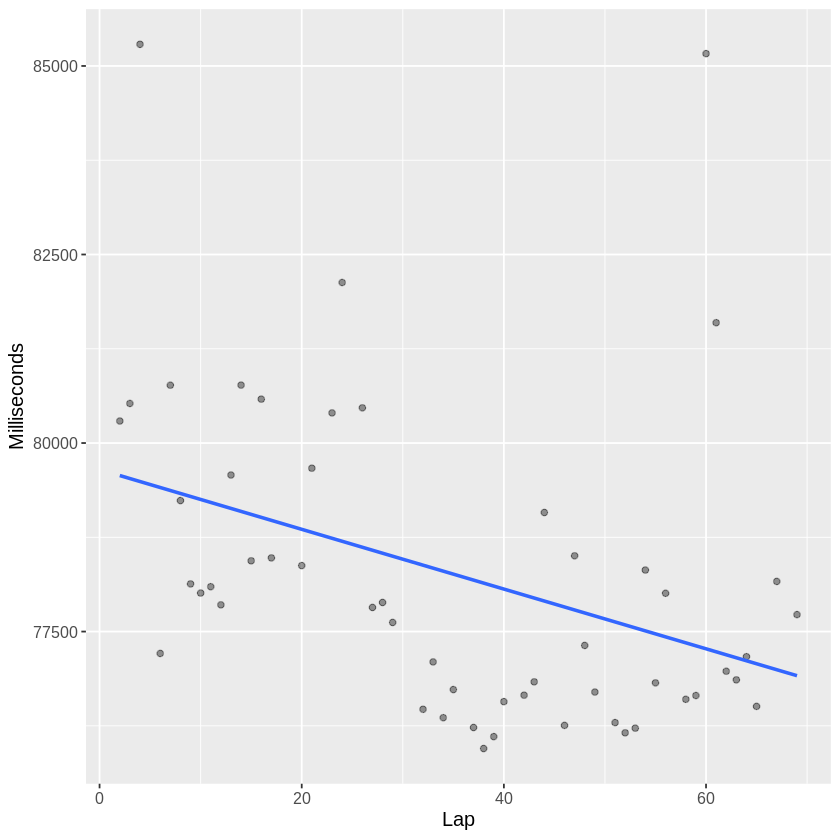

In [19]:
set.seed(2022)

#15. Netherlands

ms_netherlands <- msc_laps %>%
                filter(raceId %in% netherlands_race_ID) 

ms_netherlands_clean <- ms_netherlands %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
ms_netherlands_clean
ms_netherlands_clean_ID <- ms_netherlands_clean %>%
                        pull(raceId)


### SPLITTING DATA

ms_netherlands_races <- msc_laps %>%
                    filter(raceId %in% ms_netherlands_clean_ID)

formulaone_split <- initial_split(ms_netherlands_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 15

initiate_rmse() 

### GETS PREDICTION

get_netherlands_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1065,53


Warning message:
“The number of observations in each quantile is below the recommended threshold of 20. Stratification will be done with 2 breaks instead.”
`geom_smooth()` using formula 'y ~ x'



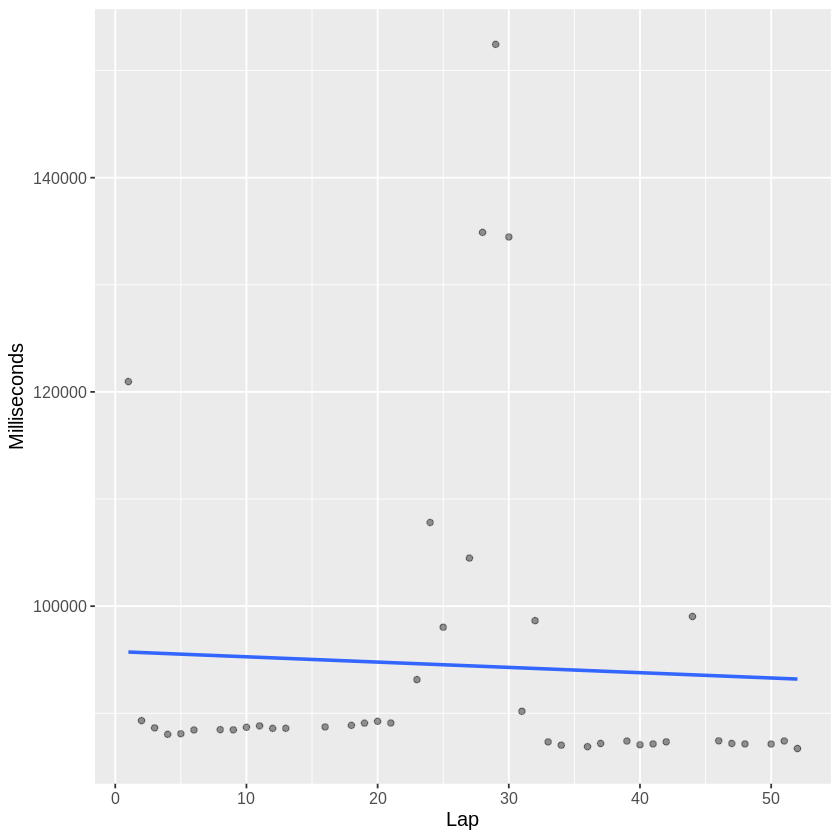

In [20]:
set.seed(2022)

#16. Italy, Monza

ms_monza <- msc_laps %>%
                filter(raceId %in% monza_race_ID) 

ms_monza_clean <- ms_monza %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n))
ms_monza_clean
ms_monza_clean_ID <- ms_monza_clean %>%
                        pull(raceId)


### SPLITTING DATA

ms_monza_races <- msc_laps %>%
                    filter(raceId %in% ms_monza_clean_ID)

formulaone_split <- initial_split(ms_monza_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 16

initiate_rmse() 

### GETS PREDICTION

get_monza_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1024,61
962,60
1003,60
982,58


`geom_smooth()` using formula 'y ~ x'



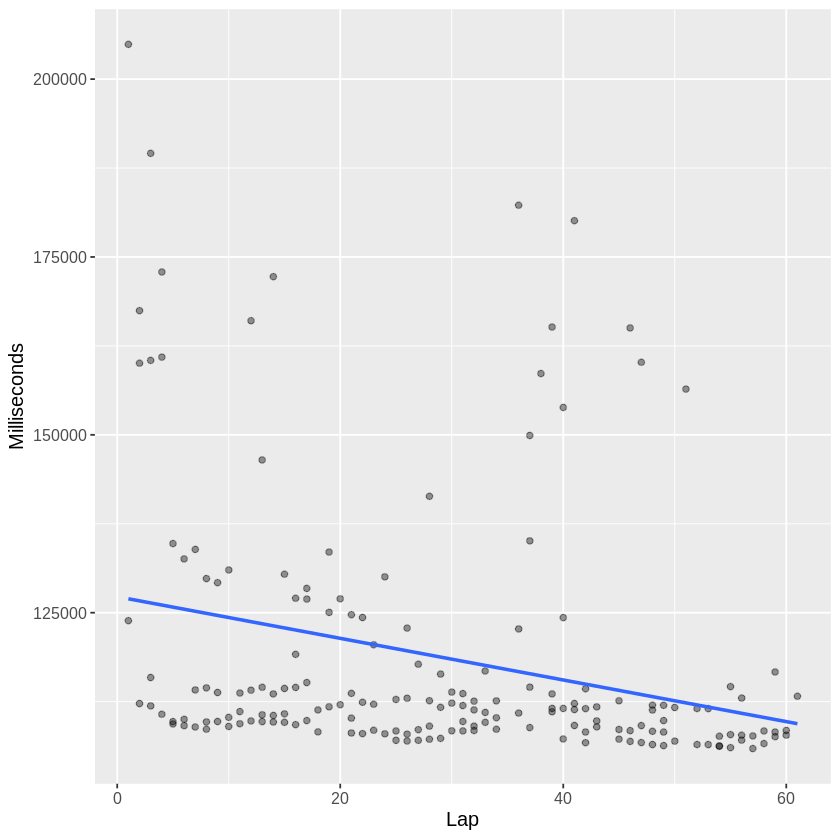

In [21]:
set.seed(2022)

#17. Singapore

ms_singapore <- haas_lap %>%
                filter(raceId %in% singapore_race_ID) 

ms_singapore_clean <- ms_singapore %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
ms_singapore_clean
ms_singapore_clean_ID <- ms_singapore_clean %>%
                        pull(raceId)


### SPLITTING DATA

ms_singapore_races <- haas_lap %>%
                    filter(raceId %in% ms_singapore_clean_ID)

formulaone_split <- initial_split(ms_singapore_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 17

initiate_rmse() 

## GETS PREDICTION

get_singapore_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
964,105
984,53
1005,53
1026,51


`geom_smooth()` using formula 'y ~ x'



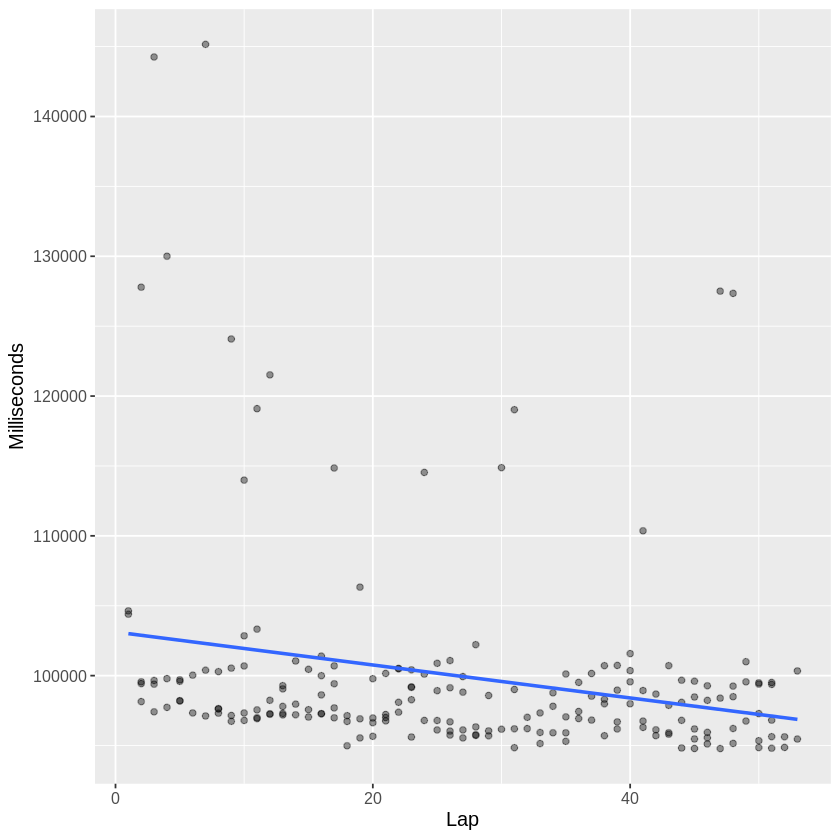

In [22]:
set.seed(2022)

#18. Japan

ms_japan <- haas_lap %>%
                filter(raceId %in% japan_race_ID) 

ms_japan_clean <- ms_japan %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n))
ms_japan_clean
ms_japan_clean_ID <- ms_japan_clean %>%
                        pull(raceId)


### SPLITTING DATA

ms_japan_races <- haas_lap %>%
                    filter(raceId %in% ms_japan_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(2:1000)

formulaone_split <- initial_split(ms_japan_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 18

initiate_rmse() 

## GETS PREDICTION

get_japan_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1069,54


Warning message:
“The number of observations in each quantile is below the recommended threshold of 20. Stratification will be done with 2 breaks instead.”
`geom_smooth()` using formula 'y ~ x'



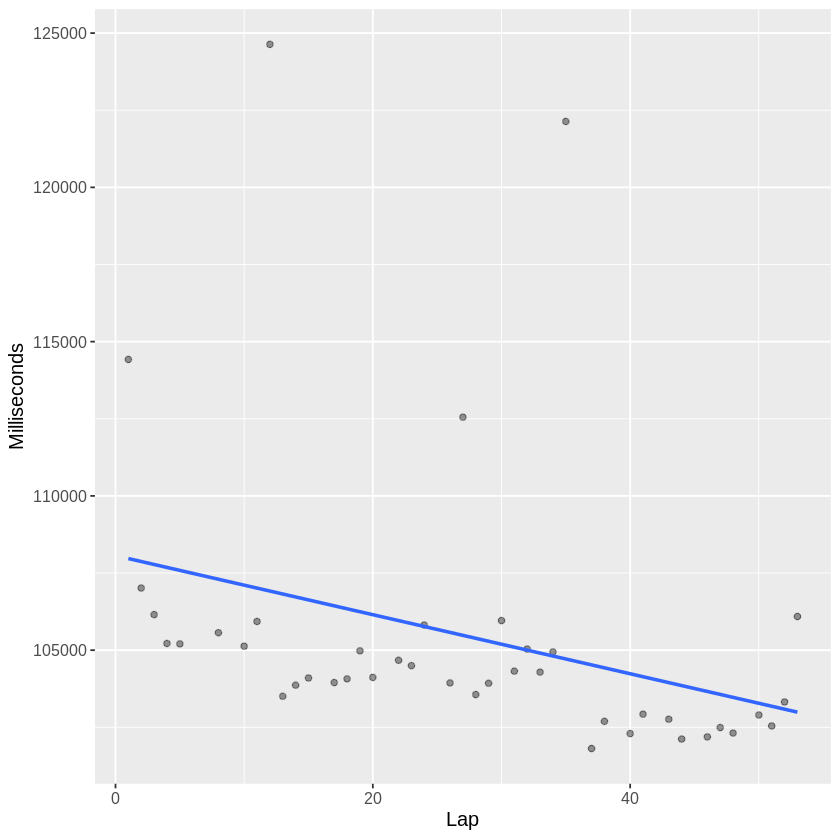

In [23]:
set.seed(2022)

#19. USA, Austin

ms_austin <- msc_laps %>%
                filter(raceId %in% austin_race_ID) 

ms_austin_clean <- ms_austin %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
ms_austin_clean
ms_austin_clean_ID <- ms_austin_clean %>%
                        pull(raceId)


### SPLITTING DATA

ms_austin_races <- msc_laps %>%
                    filter(raceId %in% ms_austin_clean_ID)

formulaone_split <- initial_split(ms_austin_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 19

initiate_rmse() 

### GETS PREDICTION

get_austin_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
966,140
986,69
1027,69
1007,68
1070,68


`geom_smooth()` using formula 'y ~ x'



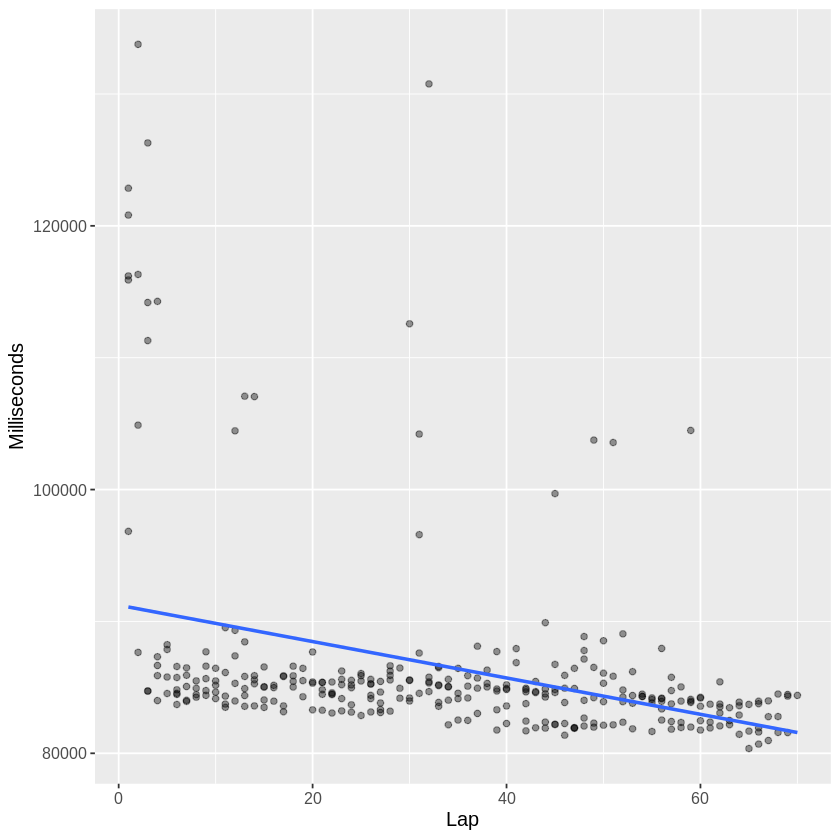

In [24]:
set.seed(2022)

#20. Mexico

ms_mexico <- haas_lap %>%
                filter(raceId %in% mexico_race_ID) 

ms_mexico_clean <- ms_mexico %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
ms_mexico_clean
ms_mexico_clean_ID <- ms_mexico_clean %>%
                        pull(raceId)


### SPLITTING DATA

ms_mexico_races <- haas_lap %>%
                    filter(raceId %in% ms_mexico_clean_ID)

formulaone_split <- initial_split(ms_mexico_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 20

initiate_rmse() 

## GETS PREDICTION

get_mexico_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1071,69


Warning message:
“The number of observations in each quantile is below the recommended threshold of 20. Stratification will be done with 3 breaks instead.”
`geom_smooth()` using formula 'y ~ x'



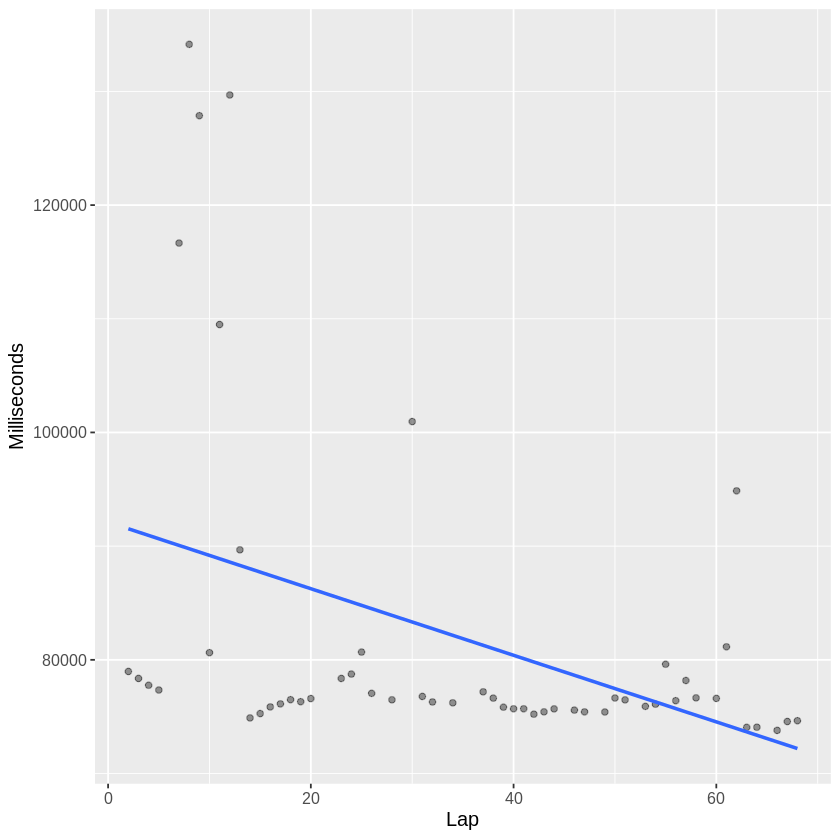

In [25]:
set.seed(2022)

#21. Brazil

ms_brazil <- msc_laps %>%
                filter(raceId %in% brazil_race_ID) 

ms_brazil_clean <- ms_brazil %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
ms_brazil_clean
ms_brazil_clean_ID <- ms_brazil_clean %>%
                        pull(raceId)


### SPLITTING DATA

ms_brazil_races <- msc_laps %>%
                    filter(raceId %in% ms_brazil_clean_ID)

formulaone_split <- initial_split(ms_brazil_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 21

initiate_rmse() 

### GETS PREDICTION

get_brazil_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
968,110
988,54
1009,54
1030,54


`geom_smooth()` using formula 'y ~ x'



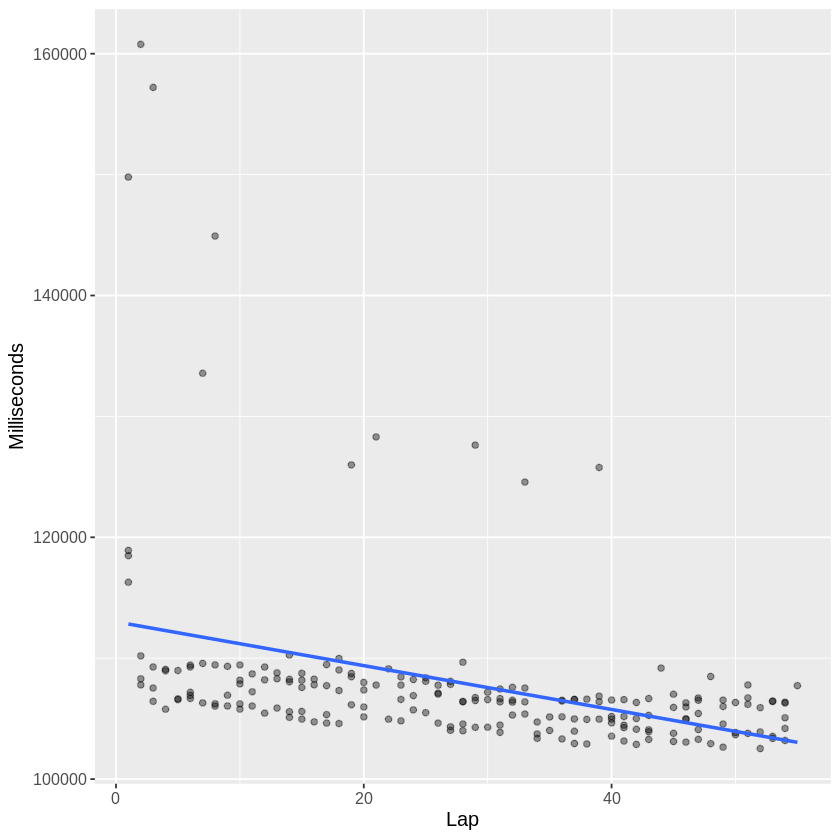

In [26]:
set.seed(2022)

#22. Abu Dhabi

ms_uae <- haas_lap %>%
                filter(raceId %in% uae_race_ID) 

ms_uae_clean <- ms_uae %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
ms_uae_clean
ms_uae_clean_ID <- ms_uae_clean %>%
                        pull(raceId)


### SPLITTING DATA

ms_uae_races <- haas_lap %>%
                    filter(raceId %in% ms_uae_clean_ID)

formulaone_split <- initial_split(ms_uae_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 22

initiate_rmse() 

### GETS PREDICTION

get_uae_prediction()

## Collection

In [27]:
rmse_col
racetime_col

ms_merge <- merge(rmse_col, racetime_col)

ms_merge

write_csv(ms_merge, "final_race_data/ms_race.csv")

.metric,.estimator,.estimate,Round
<chr>,<chr>,<dbl>,<dbl>
rmse,standard,6527.945,1
rmse,standard,7671.708,2
rmse,standard,4728.682,3
rmse,standard,20114.552,4
rmse,standard,1451.351,5
rmse,standard,3737.932,6
rmse,standard,5597.805,7
rmse,standard,591222.688,8
rmse,standard,7562.823,9


race_time_milliseconds,race_time_mins,race_time_hrs,Round
<dbl>,<dbl>,<dbl>,<dbl>
5824376,97.07293,1.617882,1
5826284,97.10473,1.618412,2
5409917,90.16528,1.502755,3
5880181,98.00302,1.633384,4
5585097,93.08495,1.551416,5
5749941,95.83235,1.597206,6
6190841,103.18068,1.719678,7
6016644,100.27740,1.671290,8
5586639,93.11065,1.551844,9


Round,.metric,.estimator,.estimate,race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,rmse,standard,6527.945,5824376,97.07293,1.617882
2,rmse,standard,7671.708,5826284,97.10473,1.618412
3,rmse,standard,4728.682,5409917,90.16528,1.502755
4,rmse,standard,20114.552,5880181,98.00302,1.633384
5,rmse,standard,1451.351,5585097,93.08495,1.551416
6,rmse,standard,3737.932,5749941,95.83235,1.597206
7,rmse,standard,5597.805,6190841,103.18068,1.719678
8,rmse,standard,591222.688,6016644,100.27740,1.671290
9,rmse,standard,7562.823,5586639,93.11065,1.551844
